<a href="https://colab.research.google.com/github/DylanCabezas/Machine_Learning_Classification/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

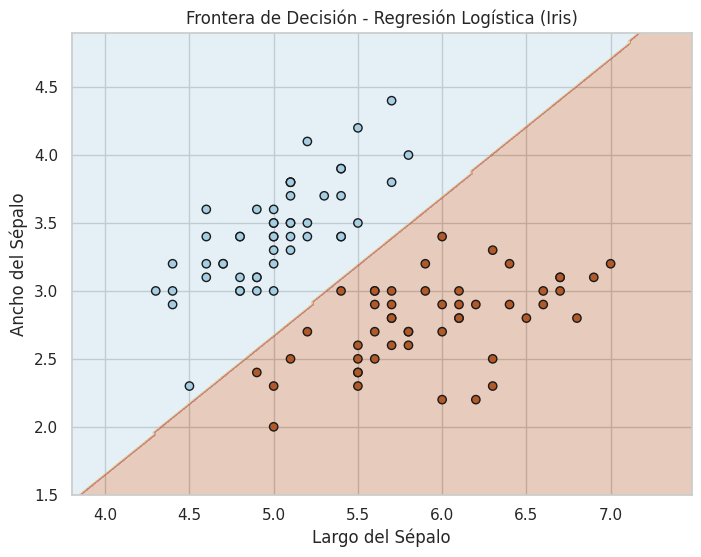

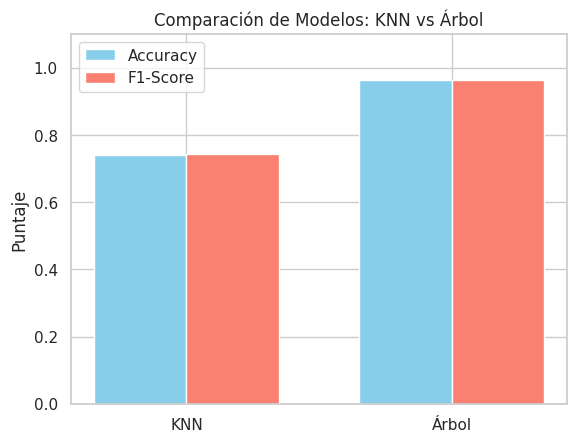

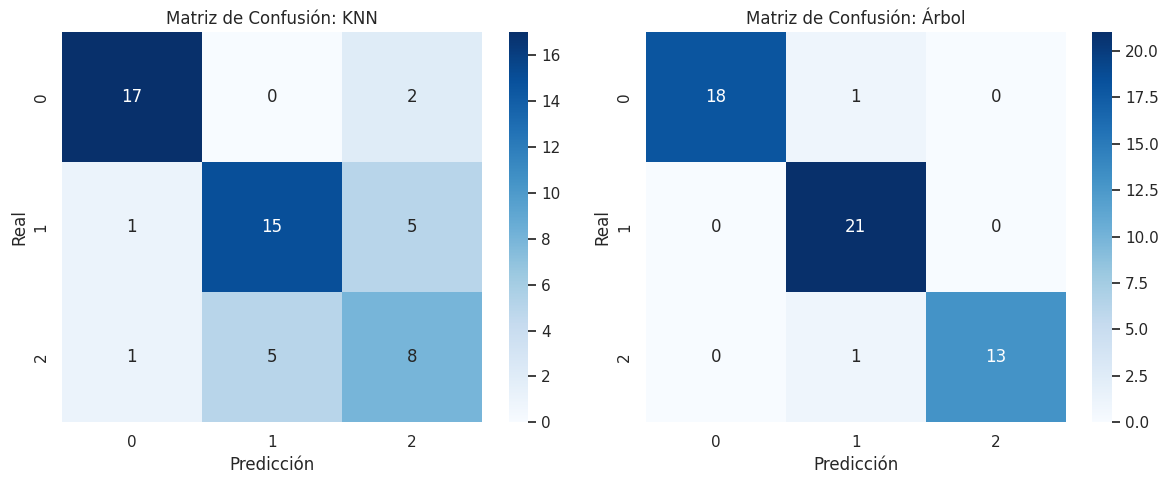

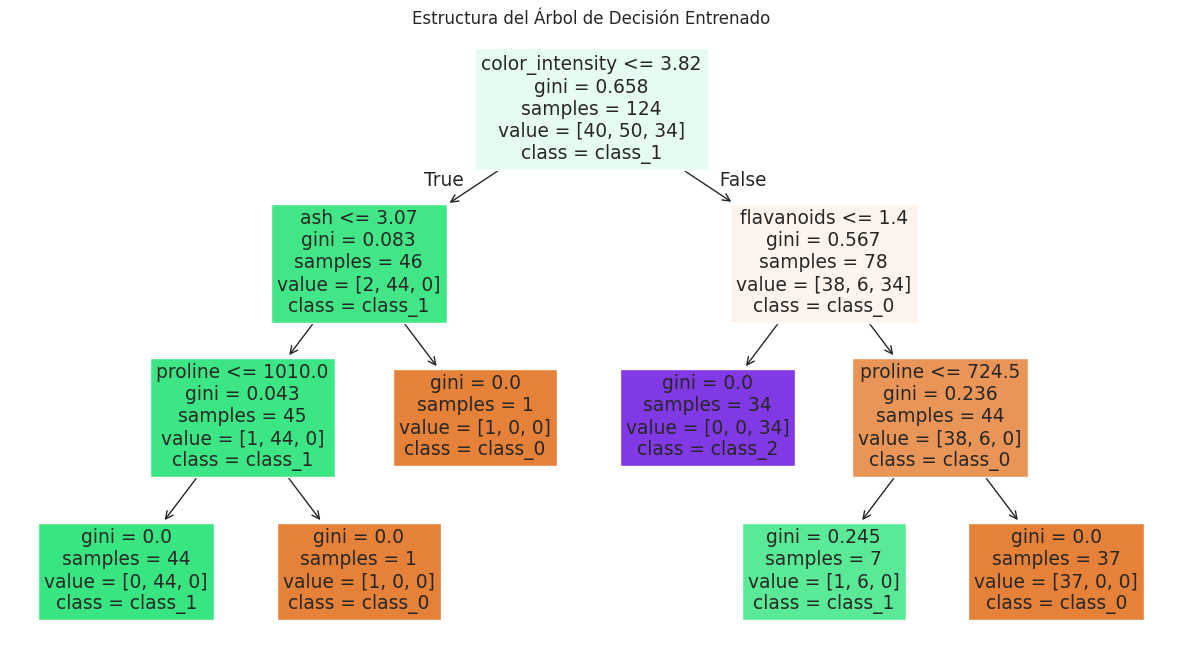

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Configuración estética
sns.set_theme(style="whitegrid")

# 1. VISUALIZACIÓN DE FRONTERAS DE DECISIÓN (IRIS)
def graficar_frontera_iris():
    iris = load_iris()
    X = iris.data[:100, :2]  # Solo 2 características y 2 clases para visualizar
    y = iris.target[:100]

    model = LogisticRegression()
    model.fit(X, y)

    # Crear malla para el fondo
    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title("Frontera de Decisión - Regresión Logística (Iris)")
    plt.xlabel("Largo del Sépalo")
    plt.ylabel("Ancho del Sépalo")
    plt.show()

# 2. ENTRENAMIENTO Y MÉTRICAS (WINE DATASET)
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, test_size=0.3, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_tree = tree.predict(X_test)

# 3. COMPARACIÓN VISUAL DE MÉTRICAS
def comparar_metricas():
    modelos = ['KNN', 'Árbol']
    accs = [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_tree)]
    f1s = [f1_score(y_test, y_pred_knn, average='weighted'), f1_score(y_test, y_pred_tree, average='weighted')]

    x = np.arange(len(modelos))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, accs, width, label='Accuracy', color='skyblue')
    ax.bar(x + width/2, f1s, width, label='F1-Score', color='salmon')

    ax.set_ylabel('Puntaje')
    ax.set_title('Comparación de Modelos: KNN vs Árbol')
    ax.set_xticks(x)
    ax.set_xticklabels(modelos)
    ax.legend()
    plt.ylim(0, 1.1)
    plt.show()

# 4. MATRIZ DE CONFUSIÓN
def graficar_matrices():
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for ax, y_pred, title in zip(axes, [y_pred_knn, y_pred_tree], ['KNN', 'Árbol']):
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
        ax.set_title(f'Matriz de Confusión: {title}')
        ax.set_xlabel('Predicción')
        ax.set_ylabel('Real')

    plt.tight_layout()
    plt.show()

# Ejecutar todas las gráficas
graficar_frontera_iris()
comparar_metricas()
graficar_matrices()

# Visualizar la estructura del árbol
plt.figure(figsize=(15, 8))
plot_tree(tree, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.title("Estructura del Árbol de Decisión Entrenado")
plt.show()